## Problem 1

Generate $N=10000$ random numbers from a Gaussian Mixture distribution
$$p(x) \propto 0.25\mathcal{N}(1, 1.0) + 0.4\mathcal{N}(5, 0.5) + 0.35\mathcal{N}(8, 2.0)$$

Generate samples using:
- mixture sampling
- rejection sampling
- MCMC sampling

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
def p(x):
    res = 0
    res += 0.25*st.norm.pdf(x, 1, 1.0)
    res += 0.4*st.norm.pdf(x, 5, 0.5)
    res += 0.35*st.norm.pdf(x, 8, 2.0)
    return res

[]

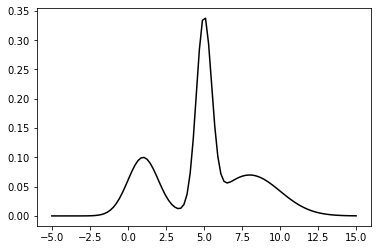

In [3]:
x_base = np.linspace(-5, 15, 100)
plt.plot(x_base, p(x_base), 'k-')
plt.plot()

In [4]:
def gen_mixture(n):
    res = []
    for i in range(n):
        pi = np.random.random()
        if pi < 0.25:
            x = np.random.normal(1, 1.0)
        elif pi < 0.65:
            x = np.random.normal(5, 0.5)
        else:
            x = np.random.normal(8, 2.0)
        res.append(x)
    return np.array(res)

[]

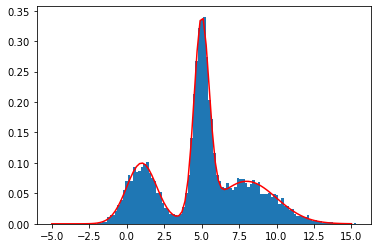

In [5]:
data = gen_mixture(10000)

plt.hist(data, bins=100, density=True)
plt.plot(x_base, p(x_base), 'r-')
plt.plot()

In [6]:
def gen_rejection(n):
    res = []
    rejected = 0
    while len(res) < n:
        x = np.random.uniform(-5, 15)
        alpha = p(x)/(7/20)
        pi = np.random.random()
        if pi < alpha:
            res.append(x)
        else:
            rejected += 1
    return np.array(res), rejected

0.8577929465301479


[]

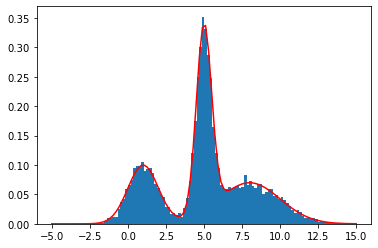

In [7]:
data, rej = gen_rejection(10000)

print(rej/(rej+10000))

plt.hist(data, bins=100, density=True)
plt.plot(x_base, p(x_base), 'r-')
plt.plot()

In [8]:
def gen_MCMC(n, sigma):
    res = []
    x = 5.0
    for i in range(n):
        y = np.random.normal(x, sigma)
        alpha = p(y)/p(x)
        pi = np.random.random()
        if pi < alpha:
            x = y
        res.append(x)
    return np.array(res)

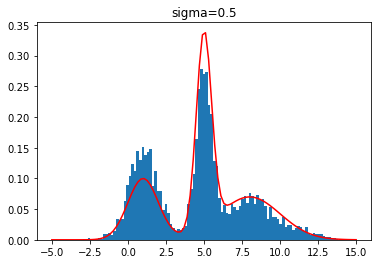

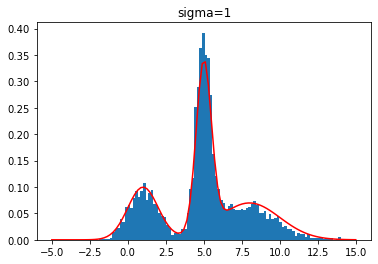

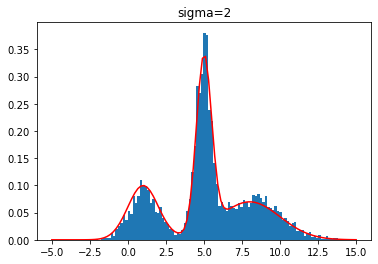

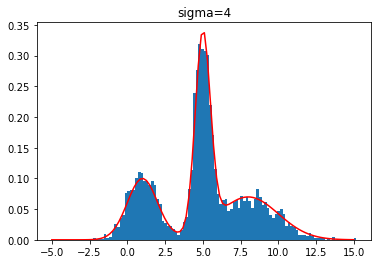

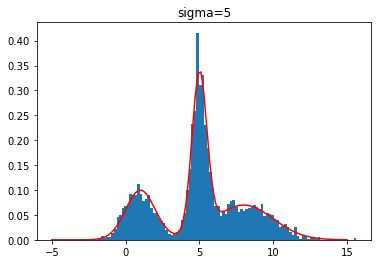

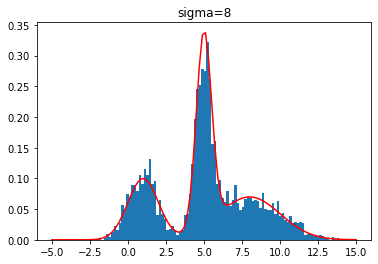

In [9]:
for s in [0.5, 1, 2, 4, 5, 8]:
    data = gen_MCMC(10000, s)

    plt.hist(data, bins=100, density=True)
    plt.plot(x_base, p(x_base), 'r-')
    plt.title(f'sigma={s}')
    plt.show()

## Problem 2

Generate 1000 points from an ARMA process. Find parameters of the process, compare to ground truth.

In [10]:
import statsmodels.api as sm
import statsmodels.tsa as tsa

In [11]:
# ARMA(2,2) process
ar = np.array([1, -0.7, 0.4])
ma = np.array([1, -0.1, -0.5])

arma = sm.tsa.ArmaProcess(ar, ma)

In [13]:
print(arma.isstationary)
print(arma.isinvertible)

True
True


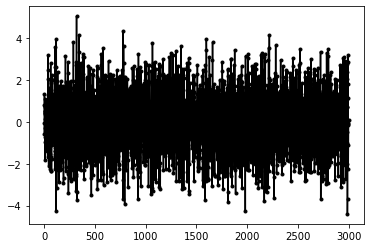

In [14]:
data = arma.generate_sample(3000)

plt.plot(np.arange(data.size), data, 'k.-')
plt.show()

In [19]:
model = sm.tsa.ARIMA(data, (2, 0, 2)).fit(disp=0)

/Users/maksimbolonkin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
model.params

array([ 0.01172775,  0.77026973, -0.41949913, -0.15615976, -0.48917076])

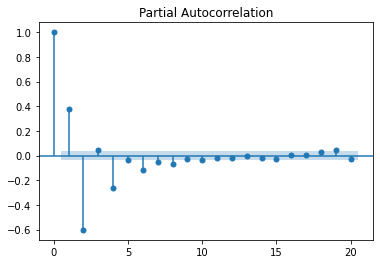

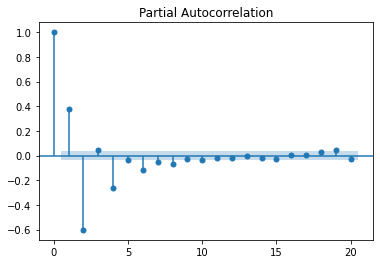

In [21]:
sm.graphics.tsa.plot_pacf(data, lags=20)

In [23]:
# AR(3) process
ar = np.array([1, -0.7, 0.4, -0.1])
ma = np.array([1])

arma = sm.tsa.ArmaProcess(ar, ma)

True
True


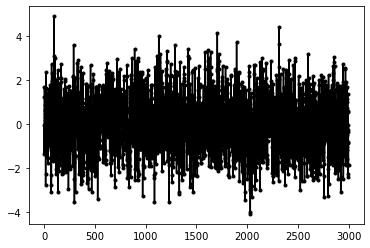

In [24]:
print(arma.isstationary)
print(arma.isinvertible)

data = arma.generate_sample(3000)

plt.plot(np.arange(data.size), data, 'k.-')
plt.show()

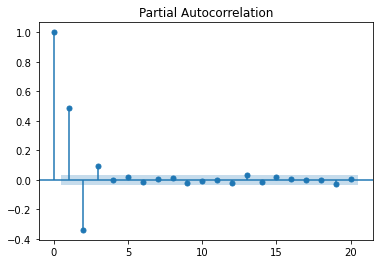

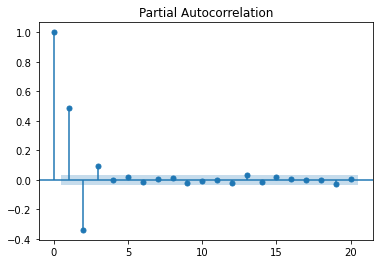

In [25]:
sm.graphics.tsa.plot_pacf(data, lags=20)

In [ ]:
model = sm.tsa.ARIMA(data, (2, 0, 2)).fit(disp=0)
